<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N¬∞05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gr√°ficos adecuados para distintos tipos de variables y preguntas de an√°lisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene informaci√≥n sobre los t√≠tulos disponibles en la plataforma Netflix hasta el a√±o 2021.

| Variable       | Clase     | Descripci√≥n                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador √∫nico del t√≠tulo en el cat√°logo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | T√≠tulo del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | Pa√≠s o pa√≠ses donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el t√≠tulo fue agregado al cat√°logo de Netflix.              |
| release_year   | entero    | A√±o de lanzamiento original del t√≠tulo.                                     |
| rating         | caracter  | Clasificaci√≥n por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duraci√≥n del contenido (minutos o n√∫mero de temporadas para series).        |
| listed_in      | caracter  | Categor√≠as o g√©neros en los que est√° clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [23]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

---

## üìä Parte 1: Exploraci√≥n visual b√°sica

1. **Distribuci√≥n de tipos de contenido**

   * Realiza un gr√°fico de barras mostrando la cantidad de pel√≠culas vs series (`type`).
   * Pregunta gu√≠a: ¬øCu√°l es el tipo de contenido predominante en Netflix? ¬øQu√© implicancias podr√≠a tener para los usuarios?

2. **Histograma de a√±os de lanzamiento**

   * Muestra c√≥mo se distribuyen los t√≠tulos seg√∫n su `release_year`.
   * Pregunta gu√≠a: ¬øHay m√°s contenido reciente o antiguo? ¬øNotas alg√∫n patr√≥n en d√©cadas espec√≠ficas?

3. **Proporci√≥n de clasificaciones por edad (`rating`)**

   * Haz un gr√°fico circular o de barras.
   * Pregunta gu√≠a: ¬øQu√© clasificaci√≥n es m√°s com√∫n? ¬øCrees que Netflix est√° m√°s enfocado en p√∫blico adulto, familiar o infantil?



**Respuesta 1**

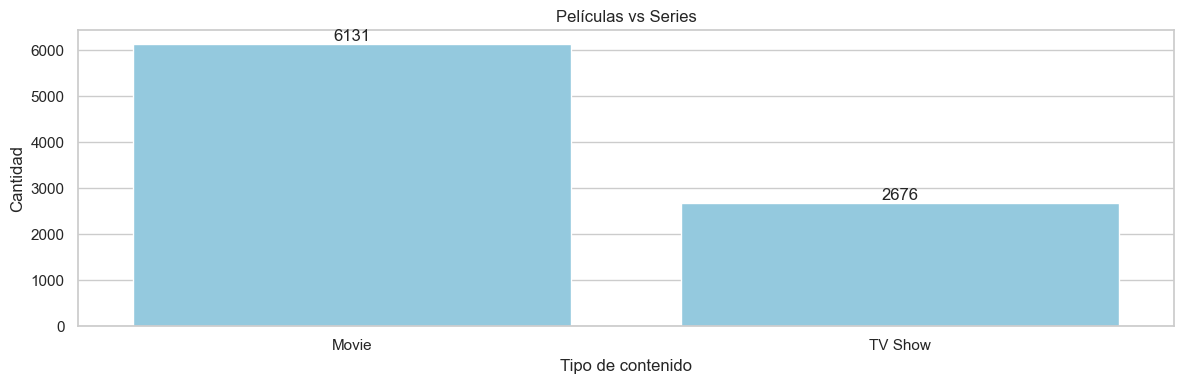

In [24]:
# seleccionar conjunto de datos
df_new1 = df.loc[lambda x: x["type"].isin(["Movie", "TV Show"])]

# gr√°fico de barras
plt.figure(figsize=(12, 4))
ax = sns.countplot(
    data=df_new1,
    x="type",
    color="skyblue"
)

# personalizaci√≥n
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.title("Pel√≠culas vs Series")
plt.tight_layout()

# etiquetas con conteo
for c in ax.containers:
    ax.bar_label(c, fmt="%d")

plt.show()

Podemos notar una fuerte predominancia de Pel√≠culas en Netflix, lo que implica una mayor probabilidad de que el usuario opte por ver una pel√≠cula en vez de una serie.

**Respuesta 2**

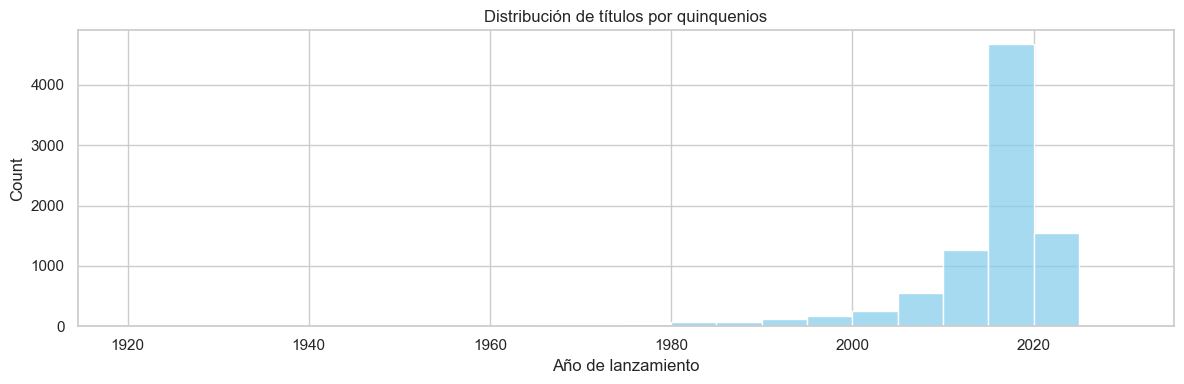

In [ ]:
import numpy as np

df_new2 = df.loc[lambda x: x["release_year"].notna()]
years = df_new2["release_year"].astype(int)

n = 10   # usar d√©cadas n=10.
start = int(np.floor(years.min() / n) * n)
end   = int(np.ceil(years.max() / n) * n)


plt.figure(figsize=(12, 4))
sns.histplot(
    data=df_new2,
    x="release_year",
    bins=range(start, end + 5, 5),  # saltos de 5 a√±os
    color="skyblue"
)

plt.xlabel("A√±o de lanzamiento")
plt.title("Distribuci√≥n de t√≠tulos por quinquenios")
plt.tight_layout()
plt.show()


Del gr√°fico podemos ver que hay una fuerte predominancia en los t√≠tulos actuales, adem√°s entre 2000 y 2020 se ve un crecimiento exponencial de lanzamientos.

**Respuesta 3**

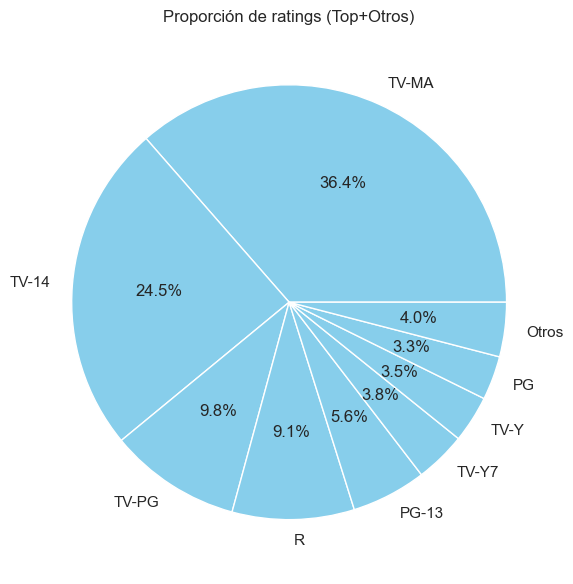

In [29]:
# seleccionar conjunto de datos
df_new3 = df.loc[lambda x: x["rating"].notna()]

# agrupar Top-8 y colapsar el resto en "Otros" (mejor legibilidad)
counts = df_new3["rating"].value_counts()
top = counts.head(8)
otros = counts.iloc[8:].sum()
plot_counts = pd.concat([top, pd.Series({"Otros": otros})])

plt.figure(figsize=(6, 6))
plot_counts.plot(kind="pie", autopct="%.1f%%", ylabel="", colors=["skyblue"]*len(plot_counts))
plt.title("Proporci√≥n de ratings (Top+Otros)")
plt.tight_layout()
plt.show()



La principales categor√≠as son TV-14 y TV-MA, que ambas categor√≠as sean dominantes significa que Netflix concentra gran parte de su cat√°logo en adolescentes en adelante.

---



## üé® Parte 2: Tendencias y evoluci√≥n en el tiempo

4. **N√∫mero de t√≠tulos agregados por a√±o**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta gu√≠a: ¬øCu√°ndo creci√≥ m√°s el cat√°logo de Netflix? ¬øQu√© relaci√≥n podr√≠a tener con la expansi√≥n internacional de la plataforma?

5. **Heatmap de lanzamientos por a√±o y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta gu√≠a: ¬øHay meses con m√°s estrenos que otros? ¬øQu√© conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duraci√≥n de pel√≠culas por g√©nero**

   * Extrae la duraci√≥n en minutos y crea un boxplot agrupado por g√©nero principal.
   * Pregunta gu√≠a: ¬øQu√© g√©neros suelen durar m√°s? ¬øQu√© podr√≠as decir sobre la variabilidad dentro de un mismo g√©nero?


**Respuesta 4**

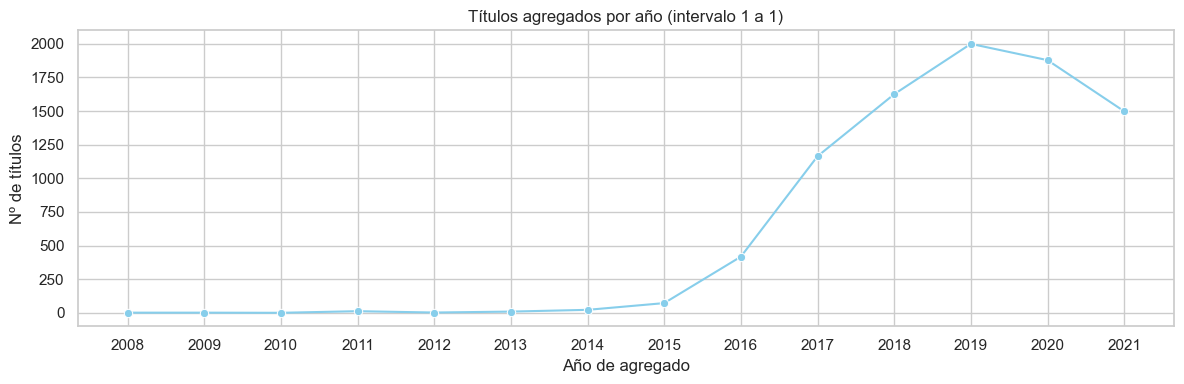

In [41]:
# Gr√°fico a√±o a a√±o
plt.figure(figsize=(12, 4))
ax = sns.lineplot(
    data=titles_per_year,
    x="year",
    y="show_id",
    marker="o",
    color="skyblue"
)

ax.set_xticks(titles_per_year["year"])

plt.xlabel("A√±o de agregado")
plt.ylabel("N¬∫ de t√≠tulos")
plt.title("T√≠tulos agregados por a√±o (intervalo 1 a 1)")
plt.tight_layout()
plt.show()



El mayor salto suele coincidir con la expansi√≥n internacional de Netflix (post 2015)

**Respuesta 5**

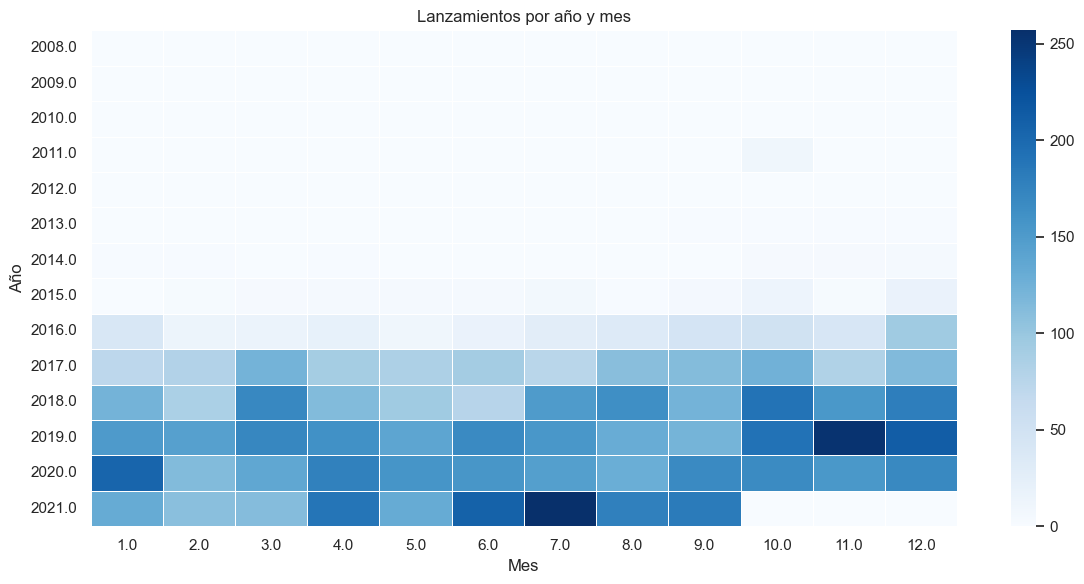

In [45]:
# Asegurarse de que date_added sea datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# Agrupar por a√±o y mes
df_new5 = df.loc[lambda x: x["year_added"].notna() & x["month_added"].notna()]
heat_data = (
    df_new5.groupby(["year_added", "month_added"])["show_id"]
           .count()
           .reset_index()
)

# Crear matriz a√±o √ó mes
heatmap = heat_data.pivot(index="year_added", columns="month_added", values="show_id").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap="Blues", linewidths=0.5)

plt.xlabel("Mes")
plt.ylabel("A√±o")
plt.title("Lanzamientos por a√±o y mes")
plt.tight_layout()
plt.show()


El heatmap sugiere que los lanzamientos no se distribuyen de manera uniforme durante el a√±o. Se aprecia un leve repunte el √∫ltimo trimestre de cada a√±o , lo que podr√≠a indicar una estacionalidad estrat√©gica.

**Respuesta 6**

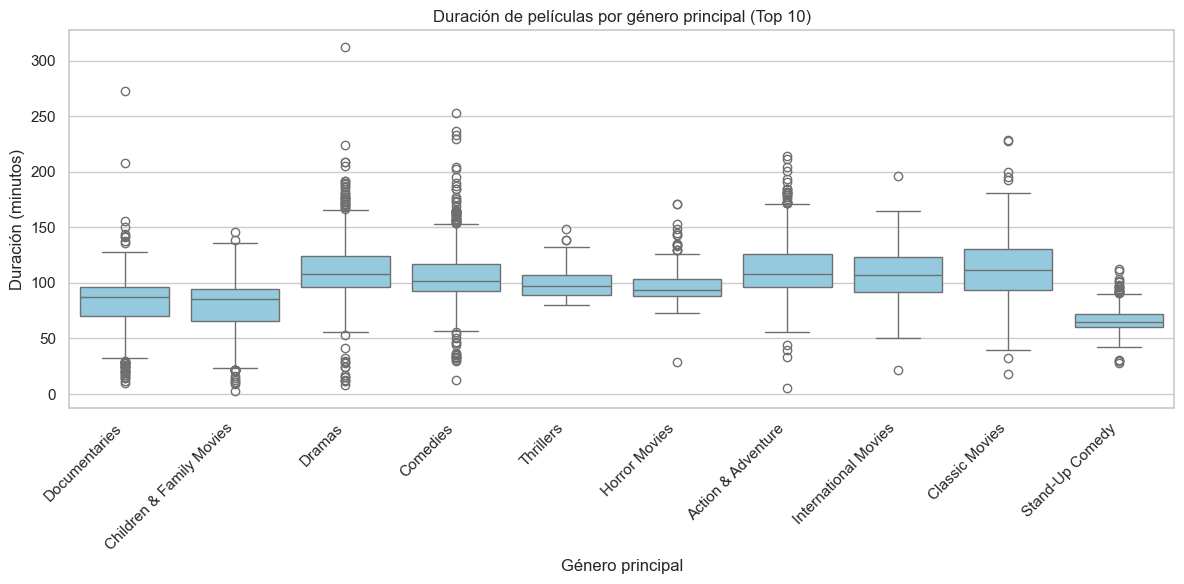

In [47]:
# Asegurar columna con minutos
def parse_duration(x):
    if pd.isna(x): return None
    if "Season" in x:   # para evitar mezclar series
        return None
    return int(x.split()[0])

df["duration_num"] = df["duration"].apply(parse_duration)

# G√©nero principal
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

# Filtrar solo pel√≠culas con duraci√≥n v√°lida
df_movies = df.loc[(df["type"]=="Movie") & (df["duration_num"].notna()) & (df["main_genre"].notna())]

# Boxplot de duraci√≥n por g√©nero principal (top 10 g√©neros m√°s frecuentes)
top_genres = df_movies["main_genre"].value_counts().head(10).index
df_top = df_movies[df_movies["main_genre"].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x="main_genre",
    y="duration_num",
    color="skyblue"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("G√©nero principal")
plt.ylabel("Duraci√≥n (minutos)")
plt.title("Duraci√≥n de pel√≠culas por g√©nero principal (Top 10)")
plt.tight_layout()
plt.show()


Los g√©neros Action, International Movies, Classic y Dramas son los que suelen durar m√°s. 
 
 Adem√°s, los outliers indican una variabilidad extrema: algunas pel√≠culas son mucho m√°s cortas o largas de lo usual, principalmente en dramas, comedidas, acci√≥n y stand-up.

---

## üî• Parte 3: Comparaciones y relaciones

7. **Top 10 pa√≠ses con m√°s producciones**

   * Usa un gr√°fico de barras para mostrar los pa√≠ses m√°s frecuentes en la columna `country`.
   * Pregunta gu√≠a: ¬øQu√© pa√≠ses dominan el cat√°logo? ¬øSorprende la distribuci√≥n o es esperada?

8. **Pel√≠culas vs Series seg√∫n g√©nero**

   * Realiza un gr√°fico de barras apiladas para mostrar la cantidad de t√≠tulos por g√©nero, separando `Movie` y `TV Show`.
   * Pregunta gu√≠a: ¬øExisten g√©neros m√°s asociados a pel√≠culas o a series?

9. **Relaci√≥n entre duraci√≥n y a√±o de lanzamiento**

   * Haz un gr√°fico de dispersi√≥n (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta gu√≠a: ¬øHan cambiado los est√°ndares de duraci√≥n de las pel√≠culas con el tiempo? ¬øSe ven outliers interesantes?



**Respuesta 7**

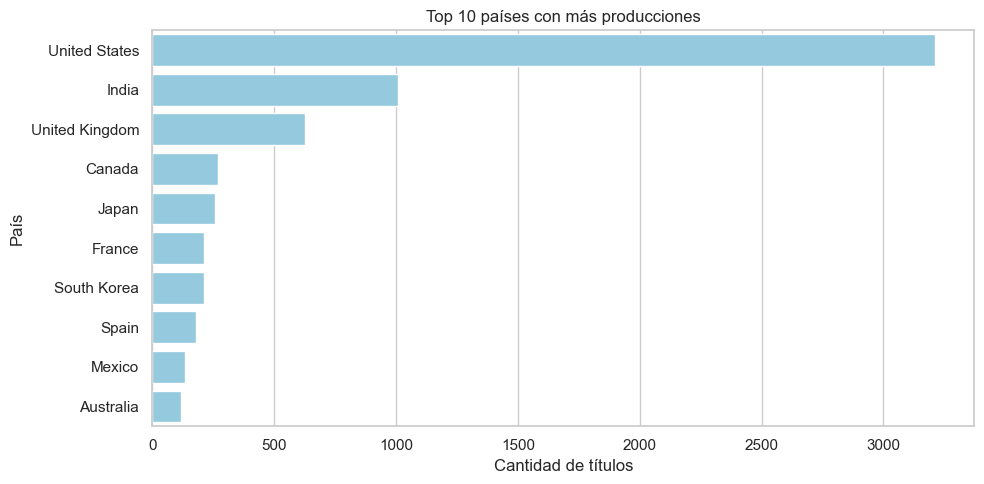

In [48]:
# Primer pa√≠s de la lista
df["country_first"] = df["country"].str.split(",").str[0].str.strip()

top_countries = df["country_first"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, color="skyblue")
plt.xlabel("Cantidad de t√≠tulos")
plt.ylabel("Pa√≠s")
plt.title("Top 10 pa√≠ses con m√°s producciones")
plt.tight_layout()
plt.show()


Los pa√≠ses que dominan las producciones son USA, India y UK. Era esperable que USA dominara debido a que Hollywood ha sido el epicentro de la industria audiovisual durante m√°s de un siglo.

**Respuesta 8**

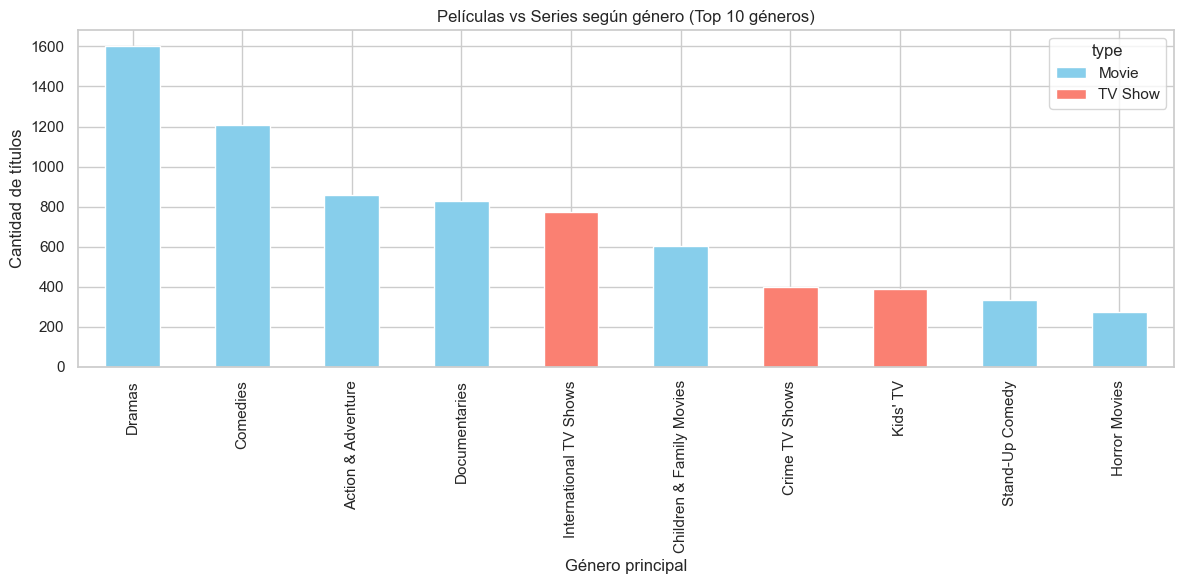

In [49]:
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

genre_type = pd.crosstab(df["main_genre"], df["type"])

# Mantener solo los 10 g√©neros m√°s frecuentes
top_genres = genre_type.sum(axis=1).sort_values(ascending=False).head(10).index
genre_type_top = genre_type.loc[top_genres]

# Gr√°fico de barras apiladas
genre_type_top.plot(kind="bar", stacked=True, figsize=(12, 6), color=["skyblue","salmon"])
plt.xlabel("G√©nero principal")
plt.ylabel("Cantidad de t√≠tulos")
plt.title("Pel√≠culas vs Series seg√∫n g√©nero (Top 10 g√©neros)")
plt.tight_layout()
plt.show()


Se evidencia una mayor cantidad de g√©neros en Pel√≠culas.

**Pregunta 9**

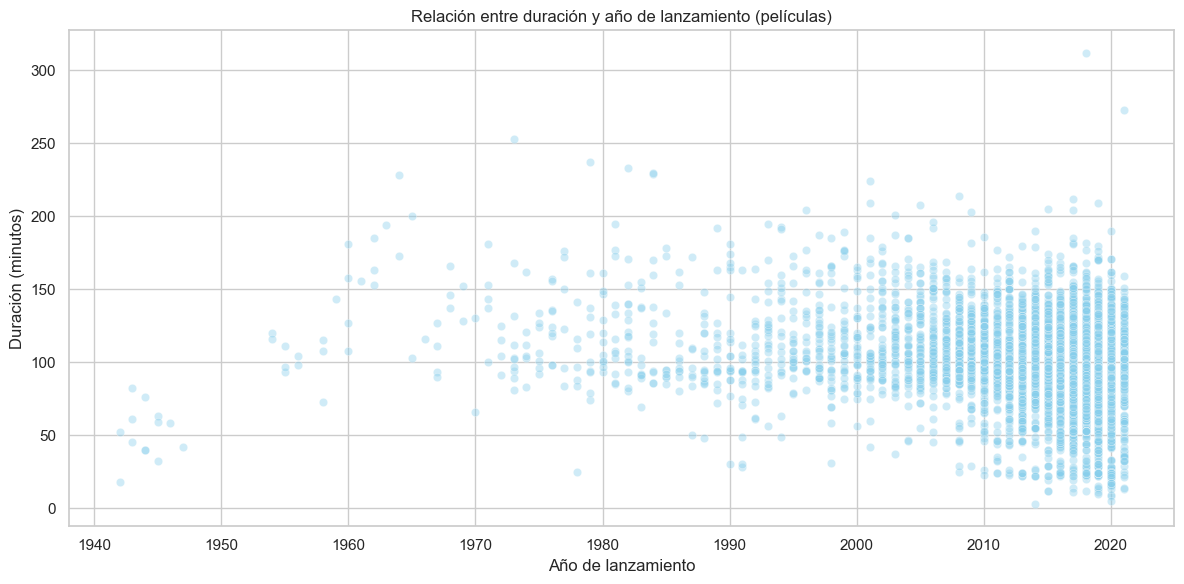

In [50]:
# Asegurar columna con minutos
def parse_duration(x):
    if pd.isna(x): return None
    if "Season" in x:   # para series
        return None
    return int(x.split()[0])

df["duration_num"] = df["duration"].apply(parse_duration)

# Filtrar pel√≠culas
df_movies = df.loc[(df["type"]=="Movie") & (df["duration_num"].notna())]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_movies,
    x="release_year",
    y="duration_num",
    alpha=0.4,
    color="skyblue"
)

plt.xlabel("A√±o de lanzamiento")
plt.ylabel("Duraci√≥n (minutos)")
plt.title("Relaci√≥n entre duraci√≥n y a√±o de lanzamiento (pel√≠culas)")
plt.tight_layout()
plt.show()


Se puede ver que la duraci√≥n se centra en los 100 minutos, sin embargo la varianza ha crecido a lo largo del tiempo.

## ‚≠ê Desaf√≠o Final

* Encuentra las combinaciones m√°s frecuentes de **g√©nero + rating** y repres√©ntalas en un **heatmap o gr√°fico de burbujas**.
* Pregunta gu√≠a: ¬øQu√© g√©neros est√°n m√°s dirigidos a un p√∫blico adulto? ¬øY cu√°les a p√∫blico familiar o infantil?

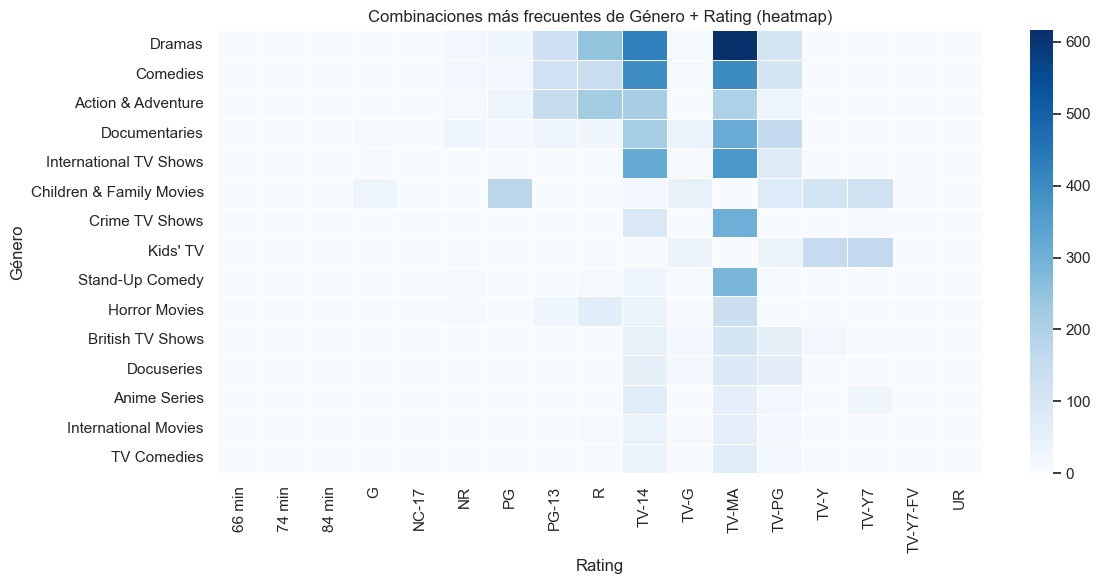

In [52]:
# Asegurar g√©nero principal
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

# Tabla de frecuencias g√©nero √ó rating
combo = pd.crosstab(df["main_genre"], df["rating"])

# Heatmap (solo top 15 g√©neros para que no quede ilegible)
top_genres = df["main_genre"].value_counts().head(15).index
combo_top = combo.loc[top_genres]

plt.figure(figsize=(12, 6))
sns.heatmap(combo_top, cmap="Blues", linewidths=0.5, annot=False)
plt.xlabel("Rating")
plt.ylabel("G√©nero")
plt.title("Combinaciones m√°s frecuentes de G√©nero + Rating (heatmap)")
plt.tight_layout()
plt.show()


El heatmap evidencia que los g√©neros m√°s populares de Netflix, como dramas, comedias y acci√≥n, se concentran en clasificaciones TV-MA y TV-14, dirigidas principalmente a un p√∫blico de adultos y adolescentes. En contraste, los g√©neros infantiles y familiares se distribuyen en ratings como TV-Y, TV-G y TV-PG que, por la intensidad, ocupan un lugar m√°s reducido.